Nilay Desai
Springboard Project

What is the True Normal Human Body Temperature?

Background

The mean normal body temperature was held to be 37 C or 98.6 F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

Exercises
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.
Answer the following questions in this notebook below and submit to your Github account.
				1. Is the distribution of body temperatures normal? 
					○ Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 
					○ Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 
				2. Is the sample size large? Are the observations independent? 
					○ Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 
				3. Is the true population mean really 98.6 degrees F? 
					○ First, try a bootstrap hypothesis test. 
					○ Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
					○ In this situation, is it appropriate to use the tt or zz statistic? 
					○ Now try using the other test. How is the result be different? Why? 
				4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
					○ Which one is the correct one to use? 
					○ What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 
				5. At what temperature should we consider someone's temperature to be "abnormal"? 
					○ As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
					○ Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 
				6. Is there a significant difference between males and females in normal temperature? 
					○ What testing approach did you use and why? 
					○ Write a story with your conclusion in the context of the original problem. 
			You can include written notes in notebook cells using Markdown: 
				• In the control panel at the top, choose Cell > Cell Type > Markdown
				• Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
			Resources
				• Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
				• Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [77]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [78]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import ndtr as ndtr
from scipy import stats
import random
import scipy

In [79]:
k2, p = stats.normaltest(df.temperature)

In [80]:
#cannot reject the null hypothesis that this is a normal dist
p

0.2587479863488254

In [81]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

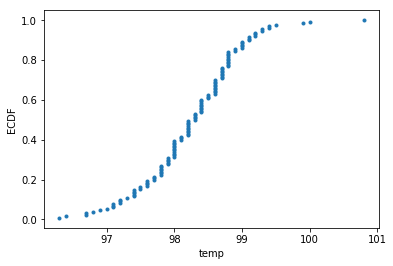

In [82]:
#distribution looks normal 
x,y = ecdf(df.temperature.values)
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('temp')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()

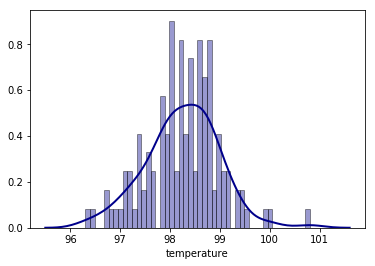

In [83]:
#hist - looks like a normal distribution
sns.distplot(df['temperature'], hist=True, kde=True, color = 'darkblue', 
             bins=48, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [84]:
#Is the sample size large? Are the observations independent? 
sample_size = len(df.temperature) #130 - yes its larger than 30 so it satisfies the condition of CLT 
#Observations are independent because one observation doesnt affect the others
#Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 

In [85]:
#Is the true population mean really 98.6 degrees F? 
#observed mean = 98.25
#First, try a bootstrap hypothesis test. answer - 98.2491013846154
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? One sample because the data is from the same population
#In this situation, is it appropriate to use the t or z statistic? 
#answer - z test because Z-tests are statistical calculations that can be used to compare population means to a sample's. The z-score tells you how far, in standard deviations, a data point is from the mean or average of a data set. A z-test compares a sample to a defined population and is typically used for dealing with problems relating to large samples (n > 30). Z-tests can also be helpful when we want to test a hypothesis. Generally, they are most useful when the standard deviation is known.
#Now try using the other test. How is the result be different? Why?

In [86]:
df.temperature.mean()

98.24923076923078

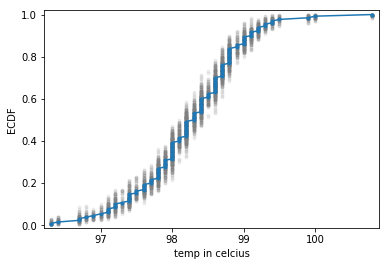

In [87]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df.temperature, size=len(df.temperature))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(df.temperature)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('temp in celcius')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [88]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
#shift the temperature

In [89]:
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.06405661469519336
0.06484267961306325


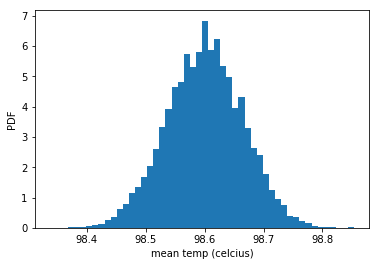

In [95]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
translated_temp = df.temperature - np.mean(df.temperature) + 98.6
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
# Compute and print SEM
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temp (celcius)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [96]:
print(bs_replicates.mean())
print(bs_replicates.std())
print(df.temperature.mean())

98.60023853846153
0.06484267961306325
98.24923076923078


In [102]:
np.sum(df.temperature <= 98.6) 

91

In [103]:
p = np.sum(bs_replicates <= 98.6) / 10000

In [104]:
p
#p value greater than 0.01 alpha there cannot reject the null hypothesis that the avg body temp is 98.6

0.4966

In [105]:
#frequentist thinking
print(df.temperature.mean())
print(df.temperature.std())

98.24923076923078
0.7331831580389454


In [57]:
#calculate the zscores
col_zscore = (df.temperature.mean() - 98.6)/(df.temperature.std(ddof=0) / np.sqrt(130))
#divide sample std/ sqrt(n)

In [58]:
col_zscore
#decision rule - 2 sided test. alpha = .05 therefore abs z val must be > 1.96

-5.475925202078116

In [59]:
#calculate p scores
p_vals = 1 - ndtr(col_zscore)
p_vals

0.9999999782384241

In [62]:
scipy.stats.norm.sf(abs(col_zscore))*2 

4.3523151658821886e-08

In [24]:
stat_significant = p_vals < .05

In [25]:
stat_significant
#cannot reject the null hypothesis because it is not statistically significant.

False

In [26]:
#run a t test 
t = (df.temperature.mean() - 98.6) / (df.temperature.std() / np.sqrt(len(df.temperature)))

In [27]:
pval = stats.t.sf(np.abs(t), len(df.temperature)-1)*2
pval

2.4106320415609943e-07

In [28]:
#p value smaller than .01 therefore reject the null hypothesis that the mean is 98.6 degrees celcius
#Results different because using a t value test which is meant for smaller samples of 30 or less 

In [29]:
#question 4
temp_sample = random.sample(list(df.temperature), k =10)

In [66]:
sample_z = (np.mean(temp_sample) - 98.6)/(np.std(temp_sample) / np.sqrt(10))

In [67]:
print(sample_z)
1 - ndtr(sample_z)
#cannot reject null
scipy.stats.norm.sf(abs(sample_z))*2 

-0.7883206675919071


0.43050916153644325

In [32]:
#run a t test 
t_sample = (np.mean(temp_sample) - 98.6) / (np.std(temp_sample) / np.sqrt(10))
pval_sample = stats.t.sf(np.abs(t_sample), len(temp_sample)-1)*2
pval_sample

0.45077316402417456

In [33]:
#cannot reject null - difference when the sample size was much larger than 30 and the degrees of freedom were different
#t stat to be used for smaller samples 

In [34]:
#z test
#z*std/sqrt(n)
z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = .733  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/np.sqrt(129))

confidence_interval = (98.25 - margin_of_error,
                       98.25 + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.6448536269514722
Confidence interval:
(98.14384599687658, 98.35615400312342)


In [68]:
from scipy.stats import t
# define probability
p = 0.975
deg_freedom = 129
# retrieve value <= probability
value = t.ppf(p, deg_freedom)
print(value)
# confirm with cdf
p = t.cdf(value, deg_freedom)
print(p)

1.978524491458605
0.974999999998822


In [69]:
#μ = M ± t(sM)
conf_upper = 92.25 + 1.98*np.sqrt(np.square(.733)/129)
conf_lower = 92.25 - 1.98*np.sqrt(np.square(.733)/129)

In [70]:
print(conf_lower)
print(conf_upper)

92.12221663816133
92.37778336183867


In [107]:
#bootstrapping
print(bs_replicates.mean())
print(bs_replicates.std())

98.60023853846153
0.06484267961306325


In [106]:
print(np.percentile(np.sort(bs_replicates), .025))
print(np.percentile(np.sort(bs_replicates), .975))

98.37192173076922
98.44923076923075


In [40]:
#question 7
#initialize
temp_males = []
temp_females = []

In [41]:
for row in df.values:
    if (row[1] == 'M'):
        temp_males.append(row[0])
    else:
        temp_females.append(row[0])

In [42]:
female_mean = np.mean(temp_females)
var_female = np.var(temp_females)

In [43]:
male_mean = np.mean(temp_males)
var_male = np.var(temp_males)

In [44]:
np.random.normal()

-0.37151369601276324

In [45]:
#run a Z test
#Ho: mean of males is the same as mean of females for temperatures
z_value = (male_mean - female_mean) 

In [46]:
male_sample = random.sample(temp_males, k =10)
female_sample = random.sample(temp_females, k = 10)

In [47]:
female_sample

[99.3, 98.3, 98.0, 97.7, 98.7, 99.0, 99.2, 98.4, 98.3, 99.0]

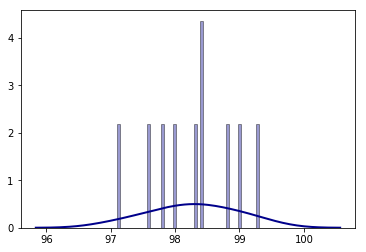

In [48]:
sns.distplot(male_sample, hist=True, kde=True, color = 'darkblue', 
             bins=48, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
#normal dist

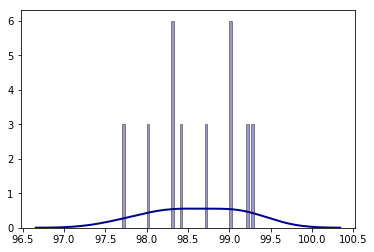

In [49]:
sns.distplot(female_sample, hist=True, kde=True, color = 'darkblue', 
             bins=48, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
#normal dist

In [50]:
samp_var_male = np.var(male_sample)
samp_var_female = np.var(female_sample)
samp_mean_female = np.mean(female_sample)
samp_mean_male = np.mean(male_sample)

In [72]:
z_sample = ((samp_mean_male - samp_mean_female)) / np.sqrt(var_male/65 + var_female/65)
#crosscheck formula

In [74]:
z_sample

-2.5482437242149696

In [76]:
scipy.stats.norm.sf(abs(z_sample))*2 

0.010826680206918918

First the sample was divided into male and female body temperature, then a random sample of 10 was taken from both male and female samples. The normality of this list was verified and then a Z test was performed on the sample mean and a two sample test was conducted with the null hypothesis being that male mean is equal to female mean. The p value obtained was less than the alpha set to be .05 therefore it is statistically significant and we can reject the null hypothesis. 